# [Meathead Math - Word of Mouth](https://xpuzzlecorner.substack.com/p/meathead-math)
## February 23, 2025

## Problem

_You’re the owner of the Meathead Math gymnasium and are starting a new series of yoga classes. At first you think you’ll need to do some advertising but then you wonder if word of mouth will be sufficient. In particular, you estimate that every member of the gym has some probability p of being friends with any other member of the gym. For example, if you’re gym member i, there’s a probability p that you’re friends with gym member j, a probability p that you’re friends with gym member k, etc. You estimate that once a gym member learns about the new yoga class, they will tell each of their other gym member friends about it._

_If you select one gym member at random to tell about the promotion, what value of p is required for at least half of the gym to hear about the promotion assuming every gym member will tell their friends when they hear about it?_

## Solution

A description of the problem setup and solution can be found [here](https://xpuzzlecorner.substack.com/p/meathead-math-word-of-mouth-solution). The solution is s high level overview of a more involved proof that can be found in Section 1.1 [here](https://sites.math.duke.edu/~rtd/DoG/allbook.pdf) and section 5.2 [here](https://faculty.sdu.edu.cn/_tsf/00/21/YvaIryj6ZvQf.pdf)

Long story short, the probability needs to be 

$$ p = \frac{2 \log(\frac{1}{2})}{n} \approx \frac{1.386}{n} $$

where n is the number of gym members.

The code below is just to simulate the problem to verify the solution. 

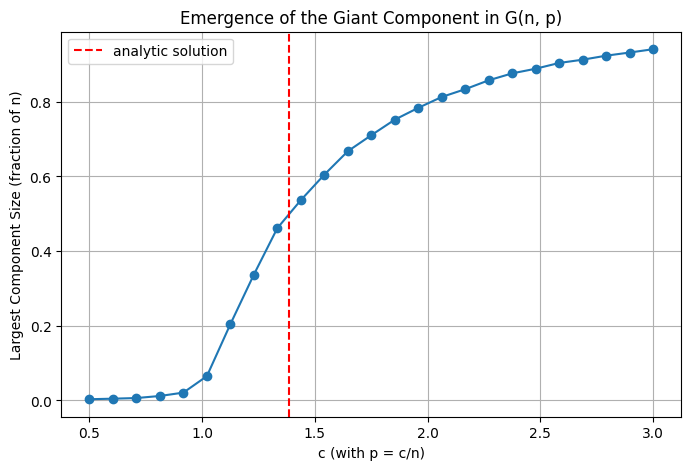

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_largest_component(n, p, trials=20):
    """
    Simulates a random graph G(n,p) a given number of trials and returns 
    the average size (as a fraction of n) of the largest connected component.
    """
    sizes = []
    for _ in range(trials):
        # Generate an Erdős–Rényi graph with n vertices and edge probability p
        G = nx.fast_gnp_random_graph(n, p)
        # Find sizes of all connected components
        if G.number_of_nodes() > 0:
            largest_cc = max(nx.connected_components(G), key=len)
            sizes.append(len(largest_cc))
        else:
            sizes.append(0)
    # Return the average fraction of vertices in the largest component
    return np.mean(sizes) / n

# Parameters for the simulation
n = 5000  # number of vertices
trials = 20  # number of trials per p-value

# Sweep over values of c such that p = c/n; 
# choose c values that cover the critical regime (giant component emerges at c=1)
c_values = np.linspace(0.5, 3.0, 25)
p_values = c_values / n

# Record the largest component fraction for each value of p
largest_component_fractions = [simulate_largest_component(n, p, trials) for p in p_values]

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(c_values, largest_component_fractions, marker='o', linestyle='-')
plt.axvline(x=1.386, color='red', linestyle='--', label='analytic solution')
plt.xlabel("c (with p = c/n)")
plt.ylabel("Largest Component Size (fraction of n)")
plt.title("Emergence of the Giant Component in G(n, p)")
plt.legend()
plt.grid(True)
plt.show()
